In [1]:
import ROOT
import uproot3

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  x86_64-linux-gnu-g++-7  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.19/01


In [5]:
InputFile_post_250 = "suppr250_bornktmin10_100M_ParsiParams_posthadron_merged.root"
InputFile_pre_250 = "suppr250_bornktmin10_100M_ParsiParams_prehadron_merged.root"

InputFile_post = "suppr800_bornktmin600_1B_ParisParams_MSTP_posthadron_merged.root"
InputFile_pre = "suppr800_bornktmin600_1B_ParisParams_MSTP_prehadron_merged.root"
f_post = ROOT.TFile.Open(InputFile_post_250, 'READ')
f_pre = ROOT.TFile.Open(InputFile_pre_250, 'READ')

fu = uproot3.open(InputFile_post_250)
fu["CMS_2021_I1972986"].keys()

[b'd21-x01-y01;1',
 b'd01-x01-y01;1',
 b'd03-x01-y01;1',
 b'd04-x01-y01;1',
 b'd24-x01-y01;1',
 b'd02-x01-y01;1',
 b'd22-x01-y01;1',
 b'd23-x01-y01;1']

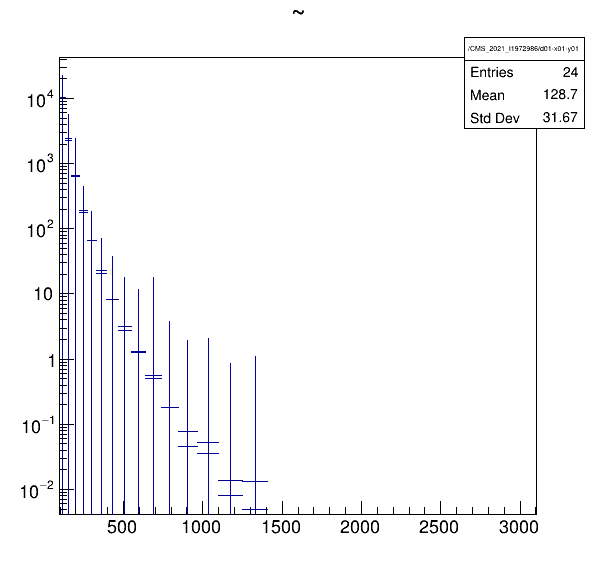

In [6]:
hist_post = f_post.Get("CMS_2021_I1972986/d01-x01-y01")
hist_pre = f_pre.Get("CMS_2021_I1972986/d01-x01-y01")

c = ROOT.TCanvas("", "", 600, 600)
c.SetLogy()

c.Draw()
hist_post.Draw("SAME")
hist_pre.Draw("SAME")



Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file 250_10_100M_NPC_ROOT.png has been created


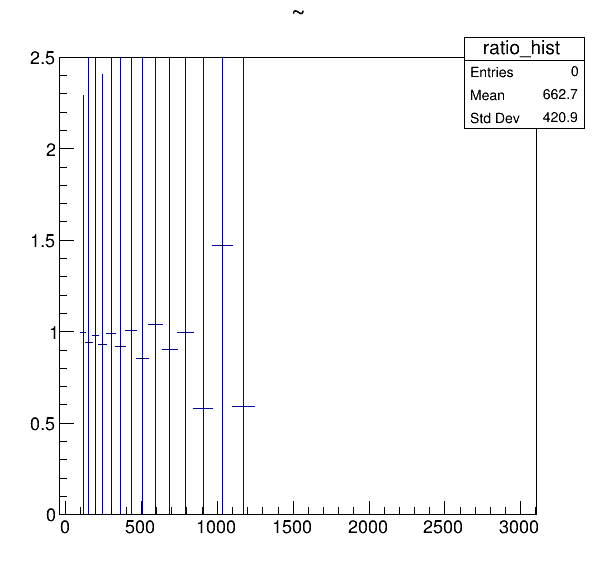

In [9]:
ratio_hist = hist_post.Clone("ratio_hist")
ratio_hist.SetMinimum(0)
ratio_hist.SetMaximum(2.5)
x=ratio_hist.GetXaxis()
ratio_hist.SetAxisRange(0,3000)

ratio_hist.Sumw2()
ratio_hist.Divide(hist_pre)
c = ROOT.TCanvas("", "", 600, 600)

c.Draw()
ratio_hist.Draw()
c.SaveAs('250_10_100M_NPC_ROOT.png')

In [19]:
ratio_hist.SetAxisRange(0,800)